## Analysing Olympics data using SQL (postgres). The original sql file is saved in 'olympics_analysis.sql' file and the outcomes of the queries have been tried to visualise here.

### *( This is a visualisation of the results of the sql queries saved in 'olympics_analysis.sql'. However, some results are visualised in graphical forms as well. Moreover, the conclusion made through this analysis is entirely based on the given dataset . No additional validation was done.)*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2 as pg
import pandas.io.sql as psql

In [4]:
plt.style.use('ggplot')

### Connecting to Postgres

In [4]:
conn = pg.connect("host=localhost dbname=test user=postgres password=postgres")
cur = conn.cursor()

In [6]:
query = "select count(1) from olympics.olympics_data;"
cur.execute(query)
print(cur.fetchall())


[(271116,)]


### Using Pandas to execute sql queries

In [7]:
query = "select * from olympics.olympics_data limit 10;"

In [8]:
df = psql.read_sql(query, con=conn)
df

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
6,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
8,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NA


# 1. Analysis

## 1. Sports that were played in all the olympics.

In [14]:
query1 = """with t1 as 
	(	-- count the total summer olympics , 29
		select count (distinct games) as total_summer_olympics
		from olympics.olympics_data
		where season = 'Summer'
	),
	
	t2 as 
	(	-- all the distinct sports played in each olympics, ordered by games (olympic edition)
		select distinct sport, games 
		from olympics.olympics_data
		where season = 'Summer'
		order by games
	),
	
	t3 as 
	( 	-- all the sports and how many olympics they were part of
		select sport, count(games) as no_of_games
		from t2 group by sport
	)
select * from t3
join t1 on t1.total_summer_olympics = t3.no_of_games;"""

In [15]:
df1 = psql.read_sql(query1, con=conn)
df1

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sport,no_of_games,total_summer_olympics
0,Swimming,29,29
1,Cycling,29,29
2,Fencing,29,29
3,Gymnastics,29,29
4,Athletics,29,29


### *Output 1:- These are the sports which were played in all the summer olympics.* 

## 2. Top 5 athletes with most Golds and their countries.

In [16]:
query2 = """with t1 as 
	(	-- fetches players with most golds in desc order
		select "name","team", count("name") as medals 
		from  olympics.olympics_data
		where season = 'Summer' and medal = 'Gold'
		group by "name","team"
		order by 2 desc
	),
	
	t2 as 
	( -- ranking them on the basis of their gold medals because there are multiple players with same no of golds
		select *, dense_rank() over(order by medals desc) as medal_rank 
		from t1
	)
select * from t2 where medal_rank <= 5;"""

In [18]:
df2 = psql.read_sql(query2, con=conn)
df2

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,team,medals,medal_rank
0,"Michael Fred Phelps, II",United States,23,1
1,"Raymond Clarence ""Ray"" Ewry",United States,10,2
2,Larysa Semenivna Latynina (Diriy-),Soviet Union,9,3
3,Paavo Johannes Nurmi,Finland,9,3
4,Mark Andrew Spitz,United States,9,3
5,"Frederick Carlton ""Carl"" Lewis",United States,9,3
6,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",United States,8,4
7,Sawao Kato,Japan,8,4
8,Usain St. Leo Bolt,Jamaica,8,4
9,"Matthew Nicholas ""Matt"" Biondi",United States,8,4


### *Output 2:- Michael Fred Phelps is the player with the most gold medals in Olympics*

### Viz 1:-

In [51]:
df2['name_country'] = df2['name'] + ' (' + df2['team'] +')'
df2.head()

,name,team,medals,medal_rank,name_country
0,"Michael Fred Phelps, II",United States,23,1,"Michael Fred Phelps, II (United States)"
1,"Raymond Clarence ""Ray"" Ewry",United States,10,2,"Raymond Clarence ""Ray"" Ewry (United States)"
2,Larysa Semenivna Latynina (Diriy-),Soviet Union,9,3,Larysa Semenivna Latynina (Diriy-) (Soviet Union)
3,Paavo Johannes Nurmi,Finland,9,3,Paavo Johannes Nurmi (Finland)
4,Mark Andrew Spitz,United States,9,3,Mark Andrew Spitz (United States)


In [56]:
df2 = df2.head(10)


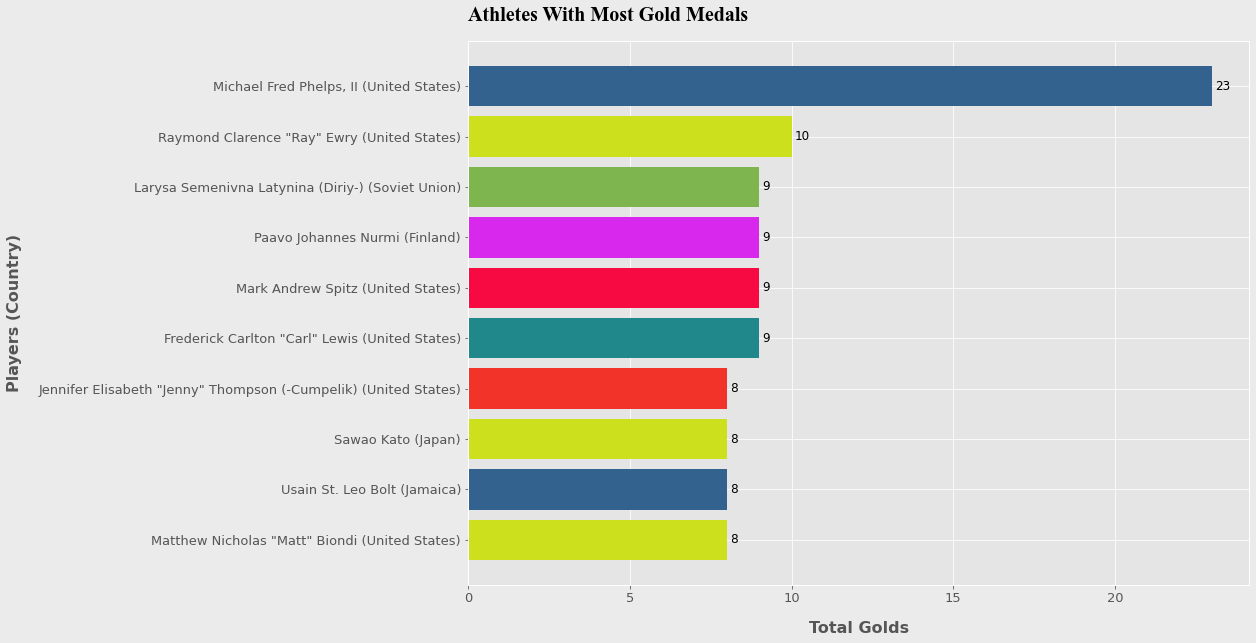

In [116]:
fig, ax1 = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax1
color = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41','#20888a','#f23329','#cde01d']
bars = ax1.barh(df2['name_country'], df2['medals'], color = color)
ax1.set_ylabel("Players (Country)",fontdict=fontdict, labelpad=16)
ax1.set_xlabel("Total Golds",fontdict=fontdict, labelpad=16)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.bar_label(bars, padding=3, fontsize=12)
ax1.set_title("Athletes With Most Gold Medals",fontdict=title_fontdict, pad=20,loc='left')
ax1.invert_yaxis()  

## 3. Total golds, silvers and bronzes won by each country.

In [9]:
query3 = """select country,
		coalesce(gold,0) as gold,  -- replacing null with 0
		coalesce(silver,0) as silver,  
		coalesce(bronze,0) as bronze  
		
		-- inner query of crosstab can't have more than 3 columns
		from crosstab(' select onr.region as country, medal,count(medal)
						from olympics.olympics_data od
						join olympics.olympics_noc_regions onr on onr.noc = od.noc
						where medal <> ''NA''
						group by onr.region, medal
						order by onr.region, medal',
						'values (''Bronze''),(''Gold''),(''Silver'')'
					 )
		as result (country varchar, bronze bigint, gold bigint, silver bigint)
	order by gold desc, silver desc, bronze desc;		
"""

In [10]:
df3 = psql.read_sql(query3, con=conn)
df3.head(10)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,gold,silver,bronze
0,USA,2638,1641,1358
1,Russia,1599,1170,1178
2,Germany,1301,1195,1260
3,UK,678,739,651
4,Italy,575,531,531
5,France,501,610,666
6,Sweden,479,522,535
7,Canada,463,438,451
8,Hungary,432,332,371
9,Norway,378,361,294


### *Output 3:- USA tops the list with highest golds, followed by Russia and Germany. Interestengly, USA also tops the list of both silver and bronze medal counts.*

### Viz 2:-

In [11]:
df3 = df3.head(10)

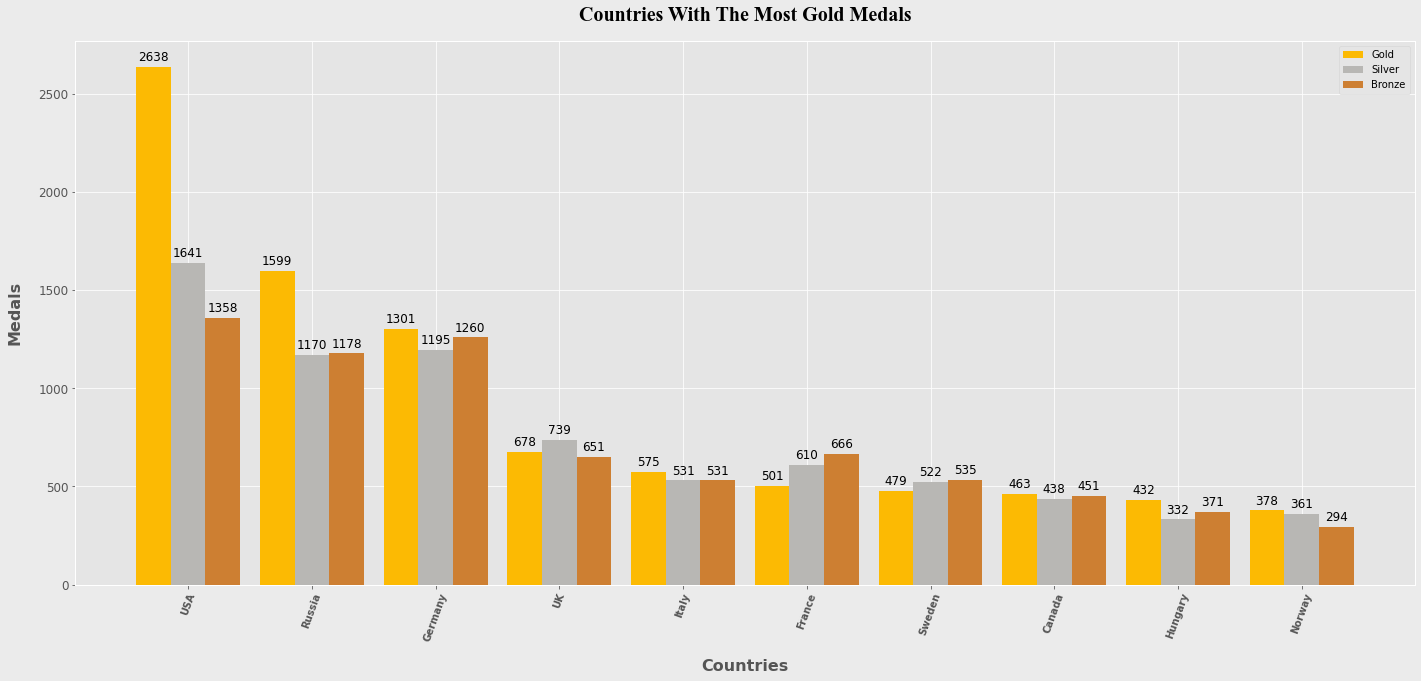

In [33]:
fig, ax1 = plt.subplots(figsize=(24,10),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax3
x = np.arange(len(df3['gold']))  # the label locations
width = 0.28  # the width of the bars
rects1 = ax1.bar(x-width, df3['gold'],width=width, color = "#fcba03", label ="Gold")
rects2 = ax1.bar(x, df3['silver'],width=width, color = "#b8b7b4", label ="Silver")
rects3 = ax1.bar(x+width, df3['bronze'],width=width, color = "#CD7F32", label ="Bronze")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Countries',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('Medals',labelpad=16, fontdict=fontdict)
ax1.set_title("Countries With The Most Gold Medals",fontdict=title_fontdict, pad=20)
ax1.set_xticks(x, df3['country'],weight = 'bold', rotation=70)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.bar_label(rects1, padding=3, fontsize=12)
ax1.bar_label(rects2, padding=3, fontsize=12)
ax1.bar_label(rects3, padding=3, fontsize=12)

ax1.legend()

plt.show()

## 4. Which countries won the most golds, silvers and bronzes in each olympic ?

In [22]:
query4 = """with temp as
(	
	select substring(games_country, 1, position(' - ' in games_country) -1) as games,
			substring(games_country, position(' - ' in games_country) +3) as country,
			coalesce(gold,0) as gold,  -- replacing null with 0
			coalesce(silver,0) as silver,  
			coalesce(bronze,0) as bronze 

			from crosstab(' select concat(games, '' - '', onr.region) as games_country, medal,count(medal)
							from olympics.olympics_data od
							join olympics.olympics_noc_regions onr on onr.noc = od.noc
							where medal <> ''NA''
							group by games, onr.region, medal
							order by games, onr.region, medal',
							'values (''Bronze''),(''Gold''),(''Silver'')'
						 )
			as result (games_country varchar, bronze bigint, gold bigint, silver bigint)
		order by games_country 
)

select distinct games,
		concat(first_value(country) over(partition by games order by gold desc), ' - ', 
			  	first_value(gold) over(partition by games order by gold desc)) as gold, 
		
		concat(first_value(country) over(partition by games order by silver desc), ' - ', 
			  	first_value(silver) over(partition by games order by silver desc)) as silver, 
				
		concat(first_value(country) over(partition by games order by bronze desc), ' - ', 
			  	first_value(bronze) over(partition by games order by bronze desc)) as bronze
from temp
order by games;"""

In [24]:
df4 = psql.read_sql(query4, con=conn)
df4.head(10)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,games,gold,silver,bronze
0,1896 Summer,Germany - 25,Greece - 18,Greece - 20
1,1900 Summer,UK - 59,France - 101,France - 82
2,1904 Summer,USA - 128,USA - 141,USA - 125
3,1906 Summer,Greece - 24,Greece - 48,Greece - 30
4,1908 Summer,UK - 147,UK - 131,UK - 90
5,1912 Summer,Sweden - 103,UK - 64,UK - 59
6,1920 Summer,USA - 111,France - 71,Belgium - 66
7,1924 Summer,USA - 97,France - 51,USA - 49
8,1924 Winter,UK - 16,USA - 10,UK - 11
9,1928 Summer,USA - 47,Netherlands - 29,Germany - 41


### *Output 4:- Countries that topped the medal chart in each olympic along with their medal counts.*

## 5. Olympics and number of participating countries.

In [25]:
query5 = """select games,count( distinct noc) from olympics.olympics_data  
-- where season = 'Summer'
group by games
order by 2 desc;"""

In [27]:
df5 = psql.read_sql(query5, con=conn)
df5.head(5)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,games,count
0,2016 Summer,207
1,2012 Summer,205
2,2008 Summer,204
3,2004 Summer,201
4,2000 Summer,200


### *Output 5:- The number of participating coutries has increased with time. Almost all countries are taking part in the recent olympics.*

### Viz 3:-

In [73]:
df5 = df5.head(7)
df5

,games,count
0,2016 Summer,207
1,2012 Summer,205
2,2008 Summer,204
3,2004 Summer,201
4,2000 Summer,200
5,1996 Summer,197
6,1992 Summer,169


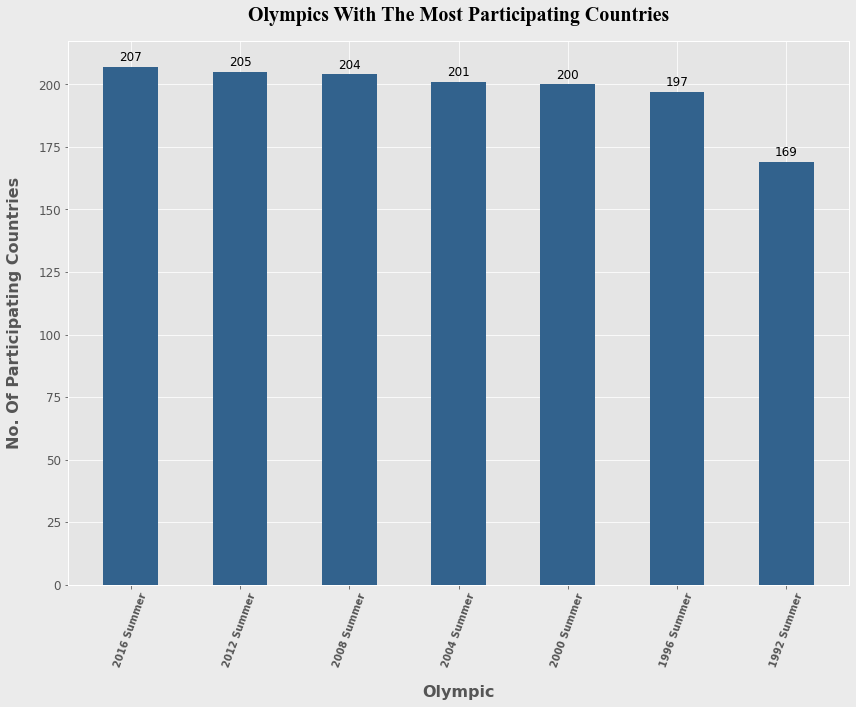

In [76]:
fig, ax1 = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))

# for ax3
x = np.arange(len(df5['count']))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax1.bar(x, df5['count'],width=width, label='Wins',color = "#32628d")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Olympic',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('No. Of Participating Countries',labelpad=16, fontdict=fontdict)
ax1.set_title("Olympics With The Most Participating Countries",fontdict=title_fontdict, pad=20)
ax1.set_xticks(x, df5['games'],weight = 'bold', rotation=70)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.bar_label(rects1, padding=3, fontsize=12)

plt.show()

## 6. Countries to have participated in all olympic games.

In [28]:
query6 = """with t1 as 
	(	-- count the total summer olympics , 29
		select count (distinct games) as total_olympics
		from olympics.olympics_data
	),
	
	t2 as 
	(	-- all the distinct teams played in each olympics, ordered by games (olympic edition)
		select distinct noc, games 
		from olympics.olympics_data
		order by games
	),
	
	t3 as 
	( 	-- all the teams and how many olympics they were part of
		select noc, count(games) as no_of_games
		from t2 group by noc
	),
	
	t4 as 
	(
		select * from t3
		join t1 on t1.total_olympics = t3.no_of_games
		join olympics.olympics_noc_regions onr on onr.noc = t3.noc
	)
select region as country, total_olympics from t4;"""

In [30]:
df6 = psql.read_sql(query6, con=conn)
df6

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,total_olympics
0,France,51
1,UK,51
2,Italy,51
3,Switzerland,51


### *Output 6:- France, UK, Italy and Switzerland are the only countries that have pariticipated in all the olympics (both summer and winter).*

## 7. Gold Medals by Age.

In [31]:
query7 = """select age, count(medal)
from olympics.olympics_data
where medal = 'Gold'
group by age;"""

In [37]:
df7 = psql.read_sql(query7, con=conn)
df7.head(8)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,age,count
0,13,7
1,14,27
2,15,75
3,16,116
4,17,199
5,18,280
6,19,459
7,20,674


### *Output 7:- The above given list shows how many total gold medals were won by athelets from each age.*

### Viz 4:-

In [99]:
df7[df7['age'] == 'NA']

,age,count
50,NA,148


In [104]:
df7 = df7.drop(50)  # NA is in the 50th row

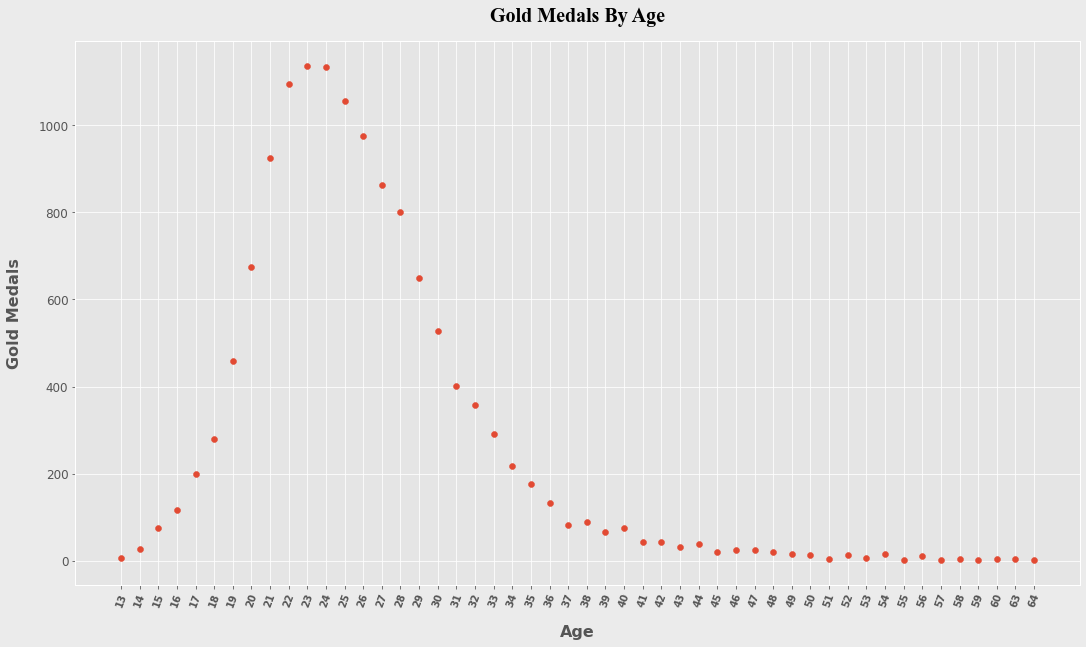

In [112]:
fig, ax1 = plt.subplots(figsize=(18,10),facecolor=(.92, .92, .92))

x = np.arange(len(df7['age'])) 


ax1.scatter(df7['age'],df7['count'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Age',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('Gold Medals',labelpad=16, fontdict=fontdict)
ax1.set_title("Gold Medals By Age",fontdict=title_fontdict, pad=20)
ax1.set_xticks(x, df7['age'],weight = 'bold', rotation=70)
ax1.tick_params(axis='y', which='major', labelsize=12)

plt.show()

*We can see in the above given visualisation that most of the gold medals are won by athletes in the age range of 20-30. Moreover 22,23,24 and 25 are the ages where 1000+ gold medals were won.*

## 8. Gold Medal by Height.

In [32]:
query8 = """select height, count(medal)
from olympics.olympics_data
where medal = 'Gold'
group by height;
"""

In [39]:
df8 = psql.read_sql(query8, con=conn)
df8.head(8)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,height,count
0,136,3
1,137,1
2,138,1
3,139,3
4,140,2
5,142,5
6,143,5
7,144,3


### *Output 8:- The above list shows the total gold medal count of each height group.*

### Viz 5:-

In [108]:
df8 = df8.drop(df8[df8['height'] == 'NA'].index)  # removing the NA value

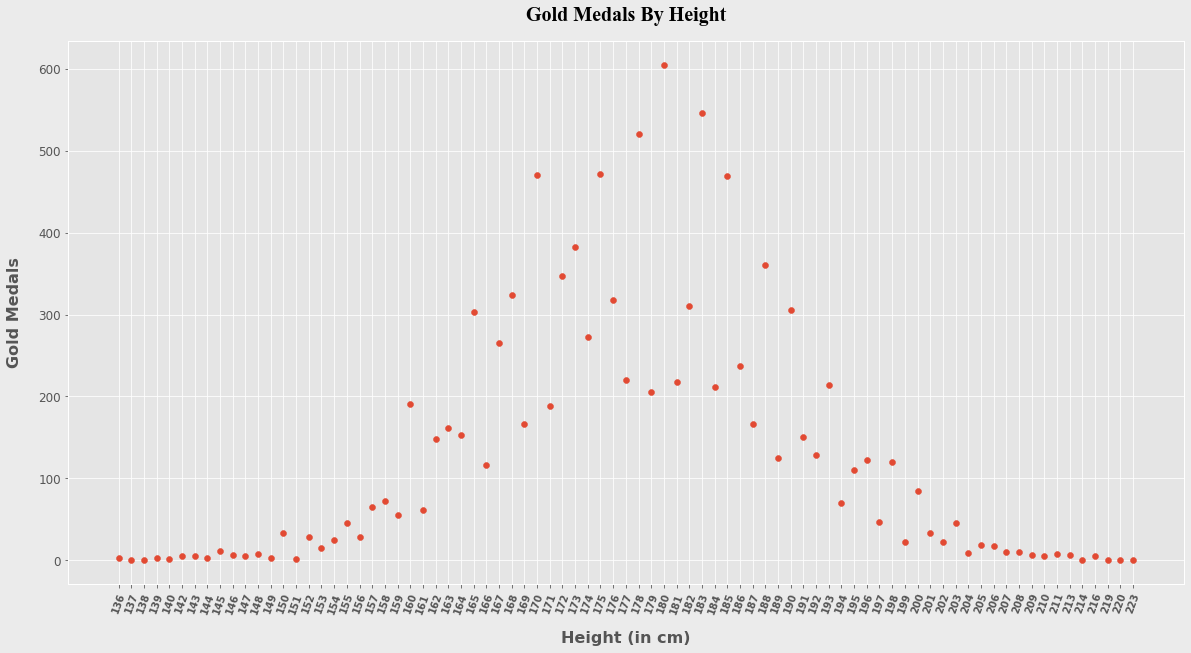

In [115]:
fig, ax1 = plt.subplots(figsize=(20,10),facecolor=(.92, .92, .92))
x = np.arange(len(df8['height'])) 
# for ax3
ax1.scatter(df8['height'],df8['count'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Height (in cm)',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('Gold Medals',labelpad=16, fontdict=fontdict)
ax1.set_title("Gold Medals By Height",fontdict=title_fontdict, pad=20)
ax1.set_xticks(x,df8['height'],weight = 'bold', rotation=70)
ax1.tick_params(axis='y', which='major', labelsize=12)

plt.show()

*Athletes with 180 cm have won the most gold medals. Also we can see that medal count is higher for the height range of (167-190)cm. This could be because most people belong to this height range.* 

## 9. Cities that have hosted the most summer olympics.

In [65]:
query9 = """select city, count( distinct games) no_of_times
from olympics.olympics_data
where season = 'Summer'
group by city
order by 2 desc;"""

In [66]:
df9 = psql.read_sql(query9, con=conn)
df9.head(10)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,city,no_of_times
0,London,3
1,Athina,3
2,Paris,2
3,Stockholm,2
4,Los Angeles,2
5,Berlin,1
6,Helsinki,1
7,Melbourne,1
8,Mexico City,1
9,Montreal,1


### *Output 9:- London and Athina have hosted the most olympic events (thrice each).*

### Viz. 6:-

In [67]:
df9 = df9.head(5)

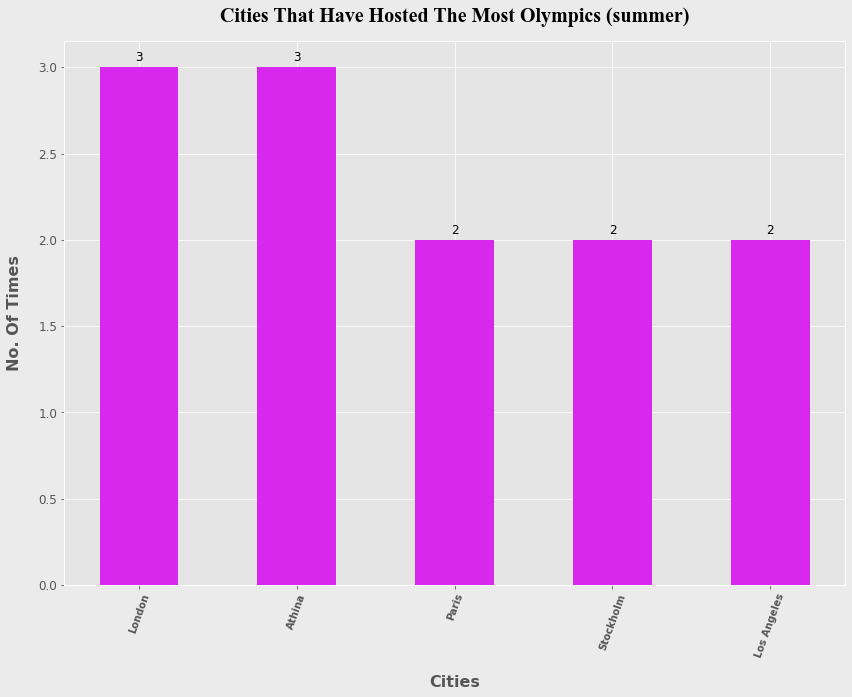

In [68]:
fig, ax1 = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))

# for ax3
x = np.arange(len(df9['no_of_times']))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax1.bar(x, df9['no_of_times'],width=width, label='Wins',color = "#d928ed")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Cities',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('No. Of Times',labelpad=16, fontdict=fontdict)
ax1.set_title("Cities That Have Hosted The Most Olympics (summer)",fontdict=title_fontdict, pad=20)
ax1.set_xticks(x, df9['city'],weight = 'bold', rotation=70)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.bar_label(rects1, padding=3, fontsize=12)

plt.show()

## 10. Countries that have won atleast one silver and/or bronze but not gold (summer olympics).

In [56]:
query10 = """with t1 as 
	(	-- selecting those countries 
		select * from olympics.olympics_data
		where season = 'Summer'and medal not in ('NA','Gold') 
		and noc not in (select distinct noc from olympics.olympics_data     -- noc not in gold medal winning country list
															where season = 'Summer' and medal = 'Gold')
	),
	t2 as
	(
		select noc,count(medal) as no_of_medal 
		from t1
		group by noc
	)
	
select region as country, no_of_medal from t2 
join olympics.olympics_noc_regions onr on onr.noc = t2.noc
order by 2 desc;"""

In [57]:
df10 = psql.read_sql(query10, con=conn)
df10.head(10)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,no_of_medal
0,Ghana,23
1,Paraguay,17
2,Iceland,17
3,Malaysia,16
4,Montenegro,14
5,Czech Republic,12
6,Philippines,10
7,Moldova,8
8,Saudi Arabia,6
9,Qatar,5


### *Output 10:- Ghana has won the most silver and/or bronze medals but no any gold yet. Similarly, Paraguay and Iceland have 17 medals without any golds.*

### Viz. 7:-

In [58]:
df10 = df10 [:10]

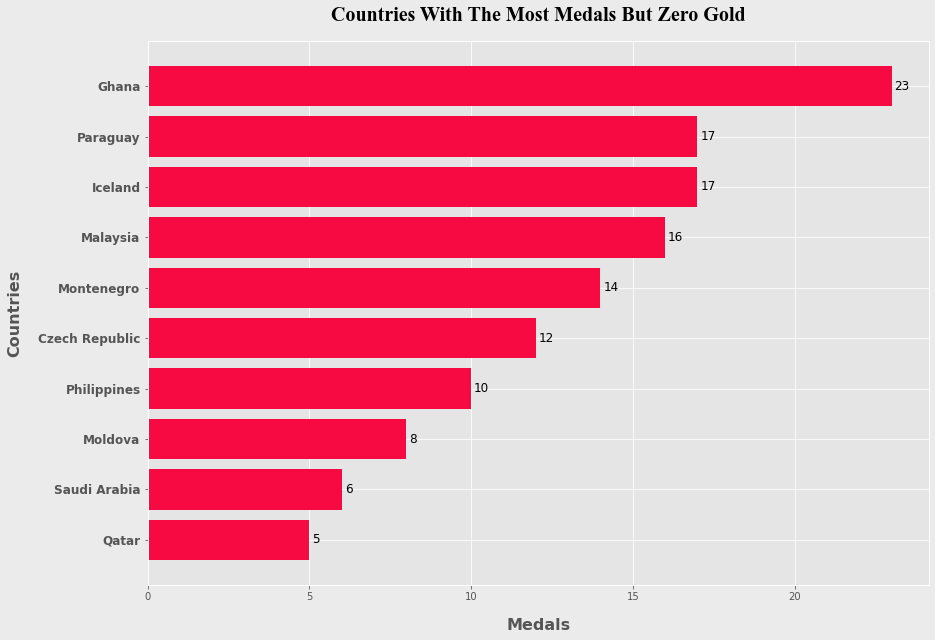

In [64]:
fig, ax1 = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax3
y = np.arange(len(df10['country']))  # the label locations
width = 0.35  # the width of the bars
rects2 = ax1.barh(y,df10['no_of_medal'] ,color = "#f70a41", label ="Silver")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Medals',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('Countries',labelpad=16, fontdict=fontdict)
ax1.set_title("Countries With The Most Medals But Zero Gold",fontdict=title_fontdict, pad=20)
ax1.set_yticks(y, df10['country'],weight = 'bold')
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.bar_label(rects2, padding=3, fontsize=12)
# ax1.bar_label(rects3, padding=3, fontsize=12)


ax1.invert_yaxis()

plt.show()

## 11. Medals of countries that have won atleast one silver and/or bronze but not gold.

In [35]:
query11 = """select * from (
    	SELECT country, coalesce(gold,0) as gold, coalesce(silver,0) as silver, coalesce(bronze,0) as bronze
    		FROM CROSSTAB('SELECT onr.region as country
    					, medal, count(1) as total_medals
						from olympics.olympics_data od
						join olympics.olympics_noc_regions onr on onr.noc = od.noc
    					where medal <> ''NA''
    					GROUP BY onr.region,medal order BY onr.region,medal',
                    'values (''Bronze''), (''Gold''), (''Silver'')')
    		AS FINAL_RESULT(country varchar,
    		bronze bigint, gold bigint, silver bigint)) x
    where gold = 0 and (silver > 0 or bronze > 0)
    order by gold desc nulls last, silver desc nulls last, bronze desc nulls last;
"""

In [36]:
df11 = psql.read_sql(query11, con=conn)
df11.head(10)

/home/kaushal/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,gold,silver,bronze
0,Paraguay,0,17,0
1,Iceland,0,15,2
2,Montenegro,0,14,0
3,Malaysia,0,11,5
4,Namibia,0,4,0
5,Philippines,0,3,7
6,Moldova,0,3,5
7,Lebanon,0,2,2
8,Sri Lanka,0,2,0
9,Tanzania,0,2,0


### Output 11:- Medal tally of countries with zero gold medal.

In [5]:
conn.close()